In this problem we are given a Excel file with data about diabetes patients
Aim:
•	Identify patients on path to high-cost disease state
•	Assign patient scores based on the severity of condition
•	Seggregate patients for 2 possible care paths
        Care Intervention
        Lower cost of care

Tasks:
1.	Cleanse the data removing blank rows
2.	Handle the outliers and missing data
3.	Implement EDA and determine quality of data and is the data sufficient to achieve any of the above objective
4.	Implement properly the categorical data with proper encoding
5.	Implement proper feature engineering
6.	Use the proper ML algorithm for training the model and data predictions. Leverage supervised or unsupervised algorithms based on the given dataset

The input dataset is uploaded in below link
https://usecasedata1.blob.core.windows.net/diabetesdc/diabetes_data.xlsx

Expected output:
Categorize patient data based on diabetes severity level(high, medium, low)




In [2]:
# Importing the required library's
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline


In [3]:
df=pd.read_excel("diabetes_data.xlsx")
display(df.head())

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,101762,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,101763,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,101764,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,101765,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      101766 non-null  object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    101766 non-null  object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                101766 non-null  object
 12  medical_specialty         101766 non-null  object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

None

In [5]:
(df.describe())

,id,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,50883.500000,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,29377.458084,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,25442.250000,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,50883.500000,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,76324.750000,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,101766.000000,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


The data frame is filled with many features out of which id, encounter_id, patient_nbr are unique and they don't have significance compared to others as they are only identifiers

<AxesSubplot: ylabel='race'>

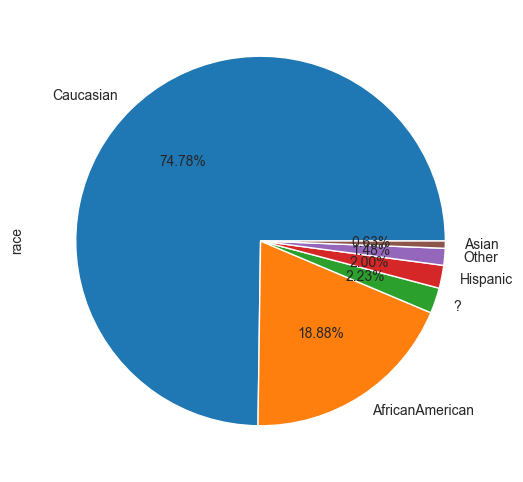

In [6]:
df=df.drop(columns=["id", "encounter_id", "patient_nbr"])
display(df)


In [7]:
# Finding the distribution of race
df["race"].value_counts().plot.pie(figsize=(16,6),autopct="%.2f%%")

2.2335554114340743

In [8]:
df["race"]=df["race"].replace("?",np.nan)
df["race"].isna().sum()*100/df.shape[0]


SyntaxError: invalid syntax (250647484.py, line 1)

The null value percent  is equal to the one the above pie chart and seeing the distribution droping will give better results

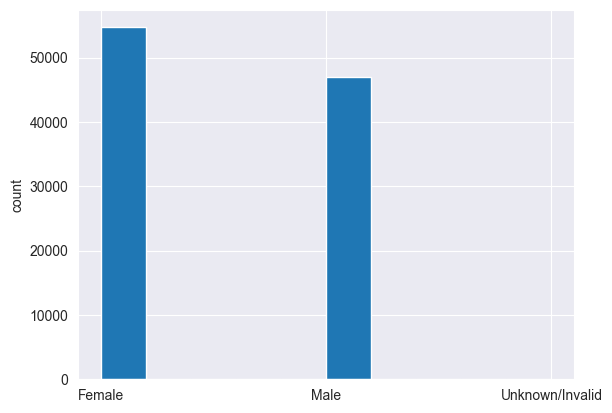

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [9]:
df=df.dropna()
df["race"].value_counts().plot.pie(figsize=(16,6),autopct="%.2f%%")


In [10]:
# Finding the distribution of gender
df["gender"].hist()
plt.ylabel("count")
plt.show()
df["gender"].value_counts()

SyntaxError: invalid syntax (1471833094.py, line 1)

There is only one value without gender so it can be removed

In [11]:
df["gender"] = df["gender"].replace("Unknown/Invalid", np.nan)
df=df.dropna()
df["gender"].hist()
plt.ylabel("count")
plt.show()
df["gender"].value_counts()

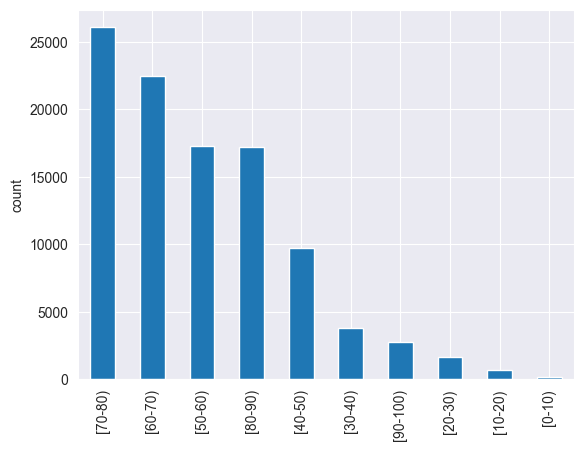

0          [0-10)
1         [10-20)
2         [20-30)
3         [30-40)
4         [40-50)
           ...   
101761    [70-80)
101762    [80-90)
101763    [70-80)
101764    [80-90)
101765    [70-80)
Name: age, Length: 101766, dtype: object


In [12]:
# Encoding the gender values

df['gender'] = df['gender'].replace({'Female' : 0, 'Male' : 1})

In [13]:
# Checking the age category distribution
df["age"].value_counts().plot(kind="bar")
plt.ylabel("count")
plt.show()
print(df["age"])

SyntaxError: invalid syntax (427311144.py, line 1)

Encoding the age data as 0-10, 10-22.... is a string and need to be converted to single numerical value for each category


In [14]:

df["age"] = df["age"].map({"[90-100)":95,
                           "[80-90)": 85,
                           "[70-80)": 75,
                           "[60-70)": 65,
                           "[50-60)": 55,
                           "[40-50)": 45,
                           "[30-40)": 35,
                           "[20-30)": 25,
                           "[10-20)": 15,
                           "[0-10)": 5})
df["age"].value_counts().plot(kind="bar")
plt.ylabel("count")
plt.show()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [15]:
display(df["A1Cresult"].value_counts())


In [16]:
df["A1Cresult"]=df["A1Cresult"].map({"None":0,
">8":3,
"Norm":1,
">7":2})

In [17]:
df["A1Cresult_present"]=df["A1Cresult"].map({"None":0,
">8":1,
"Norm":1,
">7":1})

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [ ]:
categorical_features = ['race', 'gender', 'age', 'medical_specialty', 'max_glu_serum', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide.metformin', 'glipizide.metformin', 'glimepiride.pioglitazone', 'metformin.rosiglitazone', 'metformin.pioglitazone', 'change', 'diabetesMed','readmitted']

# Apply label encoding to categorical features
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])


In [ ]:
display(df["weight"].value_counts())

In [ ]:
df["weight_present"]=df["weight"].map({"?":0,
"[75-100)":1,
"[50-75)":1,
"[100-125)":1,
"[125-150)":1,
"[25-50)":1,
"[0-25)":1,
"[150-175)":1,
"[175-200)":1,
">200":1})

In [ ]:
df["weight"]=df["weight"].map({"?":-1,
"[75-100)":75,
"[50-75)":50,
"[100-125)":100,
"[125-150)":125,
"[25-50)":25,
"[0-25)":0,
"[150-175)":150,
"[175-200)":175,
">200":200})

The value of the weight is not prescient for the majority of the data its better to drop it than to replace or predict it(P.S:Its is an importtant factor for diabetes prediction but its no good if if we have 0 to none values)
There is no values in "examide","citoglipton","metformin.rosiglitazone" so droping this as well
payer_code is insignificant in terms of the end result

In [1]:

df=df.drop("examide",axis="columns")
df=df.drop("citoglipton",axis="columns")
df=df.drop("payer_code",axis="columns")
df=df.drop("metformin.rosiglitazone",axis="columns")
df=df.drop("admission_type_id",axis="columns")
df=df.drop("discharge_disposition_id",axis="columns")
df=df.drop("admission_source_id",axis="columns")




NameError: name 'df' is not defined

In [ ]:
df["diag_1"] = pd.to_numeric(df["diag_1"], errors='coerce')
df["diag_2"] = pd.to_numeric(df["diag_2"], errors='coerce')
df["diag_3"] = pd.to_numeric(df["diag_3"], errors='coerce')
df.isna().sum()
df=df.dropna()


In [ ]:
df.isnull().sum()

In [ ]:

display(df.hist(figsize=(18,18)))




In [ ]:
cor=df.corr()
sns.heatmap(cor)

In [ ]:
# Handling Outliers using Z-score
z_scores = np.abs((df - df.mean()) / df.std())

df_no_outliers = df[(z_scores < 3).all(axis=1)]  # Keeping rows with Z-score < 3
display(df_no_outliers)
df.to_excel("cleaned_data.xlsx")

In [ ]:
df.describe()

In [ ]:
# Load the cleaned data
df = pd.read_excel("cleaned_data.xlsx")


# Define the feature columns and target column
X = df.drop("readmitted", axis=1)  # Features
y = df["readmitted"]  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:\n", classification_report(y_test, y_pred))

# Assign severity scores to patients
# This is a simplified example, actual scoring logic might be more complex
severity_scores = df["age"] + df["time_in_hospital"] + df["num_lab_procedures"]

# Identify high-cost patients
high_cost_patients = df[severity_scores >= severity_scores.quantile(0.75)]

# Segregate patients based on care paths
care_intervention_patients = high_cost_patients[high_cost_patients["num_medications"] > high_cost_patients["num_medications"].median()]
lower_cost_care_patients = high_cost_patients[high_cost_patients["num_medications"] <= high_cost_patients["num_medications"].median()]

# Print the counts of patients in each care path
print("Care Intervention Patients:", care_intervention_patients.shape[0])
print("Lower Cost Care Patients:", lower_cost_care_patients.shape[0])